In [1]:
from scipy.io.matlab import loadmat
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = loadmat("laser.mat")


number of correct lasers: 100
number of faulty lasers: 100


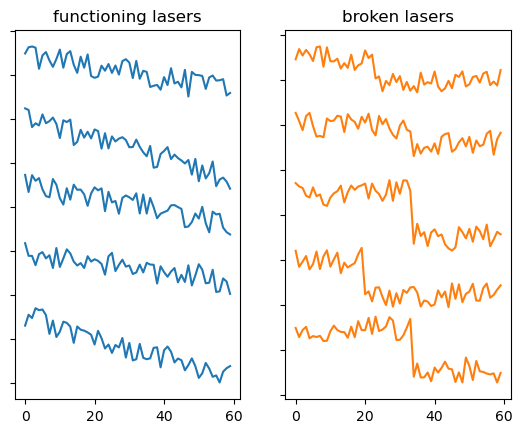

In [3]:
X = np.array(data['X'])
Y = np.array(data['Y']).reshape(-1)

fig, ax = plt.subplots(1, 2)
neg = X[Y == -1]
pos = X[Y == 1]
for i in range(5):
    ax[0].plot(np.arange(0, 60), pos[i] + i * 30, color='C0')
for i in range(5):
    ax[1].plot(np.arange(0, 60), neg[i] + i * 30, color='C1')
ax[0].set_title("functioning lasers")
ax[1].set_title("broken lasers")
for axis in ax:
    axis.set_yticklabels([])
plt.savefig("plot_lasers")

print("number of correct lasers:", Y[Y == 1].size)
print("number of faulty lasers:", Y[Y == -1].size)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [4]:
from sklearn.metrics import accuracy_score, f1_score

def test(clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("accuracy: ", accuracy_score(y_test, y_pred))
    print("f1_score: ", f1_score(y_test, y_pred))

In [5]:
from sklearn.model_selection import GridSearchCV
def find_best_model(clf, param_grid):
    search = GridSearchCV(clf, param_grid=param_grid, scoring='f1_macro')
    search.fit(X_train, y_train)
    print(search.best_params_)
    return search.best_estimator_

In [6]:
from sklearn.linear_model import LogisticRegression
log_loss = LogisticRegression(random_state=42, max_iter=1000)
test(log_loss)

accuracy:  0.95
f1_score:  0.9565217391304348


In [7]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
test(nb_clf)

accuracy:  0.875
f1_score:  0.878048780487805


In [8]:
from sklearn.neural_network import MLPClassifier

nn_param_grid = {
    "hidden_layer_sizes": [62, 126, 252, 510],
    'alpha': [0.1, 0.001, 0.01, 0.0001]
}
nn_clf = find_best_model(MLPClassifier(max_iter=1000, activation='relu'), nn_param_grid)
test(nn_clf)

{'alpha': 0.01, 'hidden_layer_sizes': 252}
accuracy:  0.925
f1_score:  0.9333333333333332


In [9]:
from sklearn.tree import DecisionTreeClassifier
tree_param_grid  = {
    'max_depth': [3, 5, 6],
    'criterion': ['gini', 'entropy']
}

tree_clf = DecisionTreeClassifier(criterion='entropy')
test(tree_clf)

accuracy:  0.95
f1_score:  0.9565217391304348


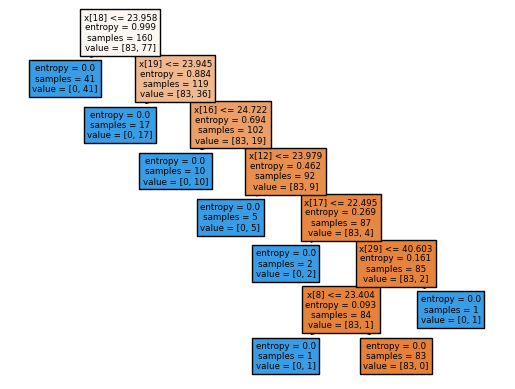

<Figure size 640x480 with 0 Axes>

In [10]:
from sklearn.tree import plot_tree

plt.figure()
plot_tree(tree_clf, filled=True)
plt.show()
plt.savefig("tree")

In [11]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_samples=0.9, random_state=42)
forest_param_grid = {
    'n_estimators': [1, 20, 50, 100, 150],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 6]
}
forest_clf = find_best_model(forest, forest_param_grid)
test(forest_clf)



{'criterion': 'gini', 'max_depth': None, 'n_estimators': 100}
accuracy:  0.95
f1_score:  0.9545454545454545
